In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from tensorflow.keras.applications import DenseNet201, EfficientNetB5, InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

def load_model(model_name):
    if model_name == 'DenseNet201':
        base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=image_size + (3,))
    elif model_name == 'EfficientNetB5':
        base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=image_size + (3,))
    elif model_name == 'InceptionResNetV2':
        base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=image_size + (3,))
    else:
        raise ValueError("Model not supported")
    
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))
    return model

def extract_features(generator, model):
    features = []
    labels = []
    
    for images, lbls in generator:
        features_batch = model.predict(images)
        features.append(features_batch)
        labels.append(lbls)
        
        # Break after going through one epoch
        if generator.batch_index == 0:
            break
    
    features = np.concatenate(features)
    labels = np.concatenate(labels)
    return features, labels


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

data_dir = "C:\\Users\\nezes\\Documents\\Github_projects\\Brain_tumour\\archive"
image_size = (229, 229)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Training'),
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Training'),
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.



Extracting features using DenseNet201...
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━

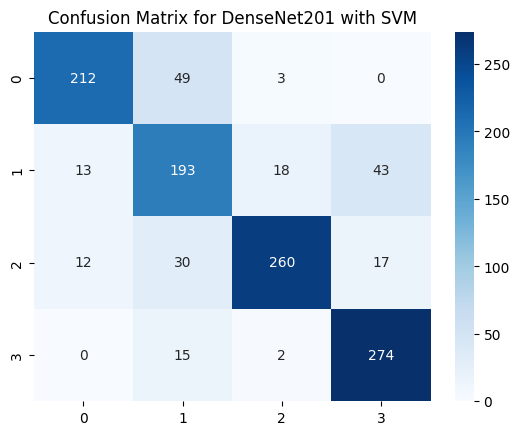


Training MLP with DenseNet201 features...

Classification Report for DenseNet201 with MLP:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       264
           1       0.83      0.83      0.83       267
           2       0.93      0.88      0.90       319
           3       0.89      0.95      0.92       291

    accuracy                           0.89      1141
   macro avg       0.89      0.89      0.89      1141
weighted avg       0.89      0.89      0.89      1141



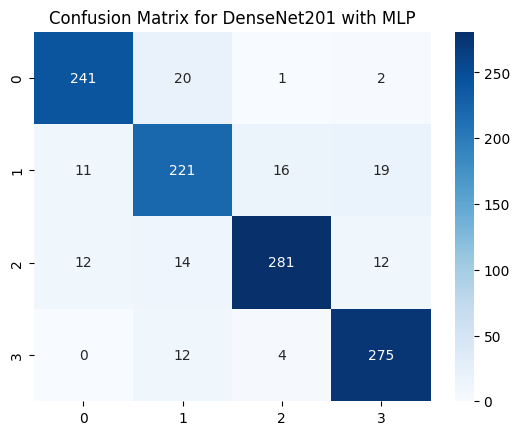


Training GNB with DenseNet201 features...

Classification Report for DenseNet201 with GNB:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77       264
           1       0.51      0.67      0.58       267
           2       0.88      0.68      0.77       319
           3       0.80      0.86      0.83       291

    accuracy                           0.73      1141
   macro avg       0.75      0.73      0.73      1141
weighted avg       0.76      0.73      0.74      1141



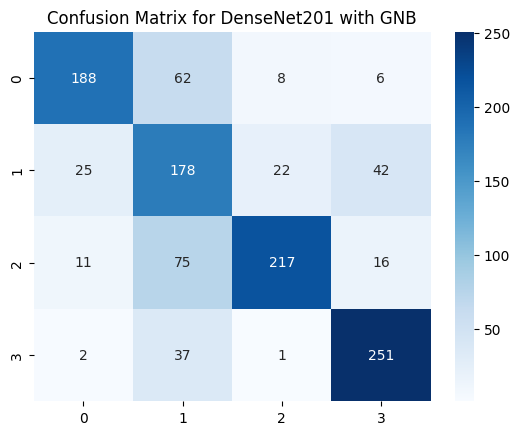

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step

Extracting features using EfficientNetB5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1

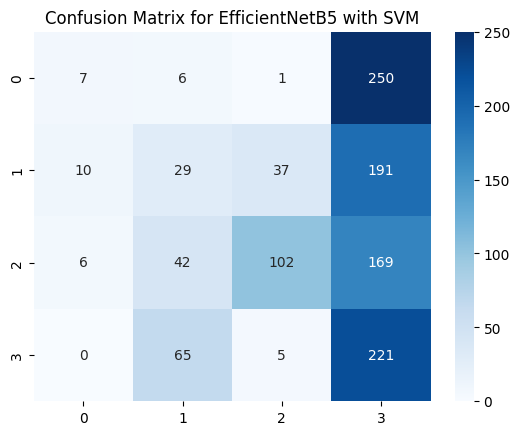


Training MLP with EfficientNetB5 features...

Classification Report for EfficientNetB5 with MLP:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       264
           1       0.54      0.57      0.55       267
           2       0.80      0.83      0.81       319
           3       0.78      0.75      0.77       291

    accuracy                           0.74      1141
   macro avg       0.74      0.73      0.73      1141
weighted avg       0.74      0.74      0.74      1141



c:\Users\nezes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


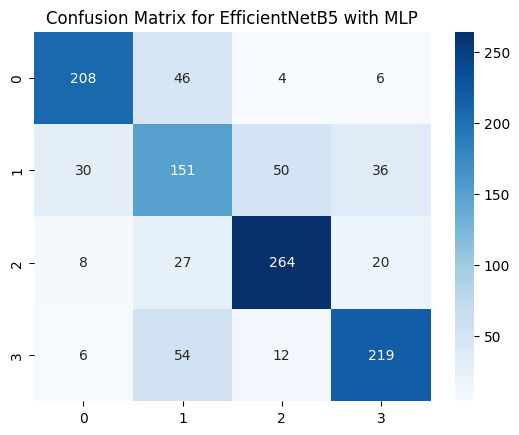


Training GNB with EfficientNetB5 features...

Classification Report for EfficientNetB5 with GNB:
               precision    recall  f1-score   support

           0       0.45      0.86      0.59       264
           1       0.24      0.15      0.19       267
           2       0.63      0.55      0.59       319
           3       0.44      0.27      0.33       291

    accuracy                           0.46      1141
   macro avg       0.44      0.46      0.42      1141
weighted avg       0.45      0.46      0.43      1141



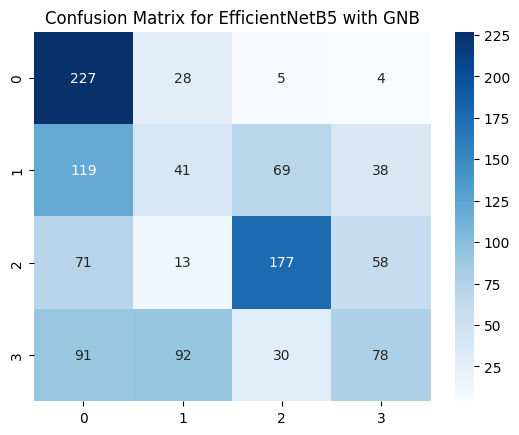


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step

Extracting features using InceptionResNetV2...
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/st

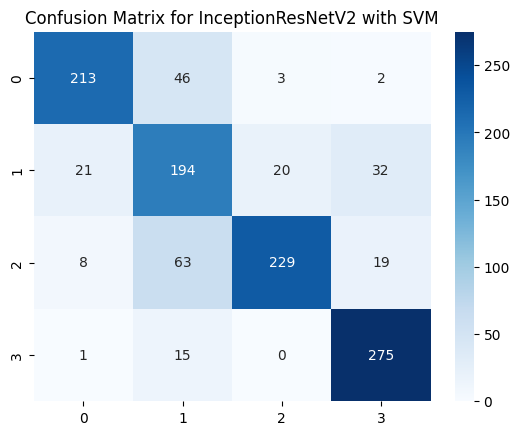


Training MLP with InceptionResNetV2 features...

Classification Report for InceptionResNetV2 with MLP:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       264
           1       0.77      0.85      0.81       267
           2       0.94      0.84      0.89       319
           3       0.90      0.93      0.92       291

    accuracy                           0.88      1141
   macro avg       0.88      0.88      0.88      1141
weighted avg       0.88      0.88      0.88      1141



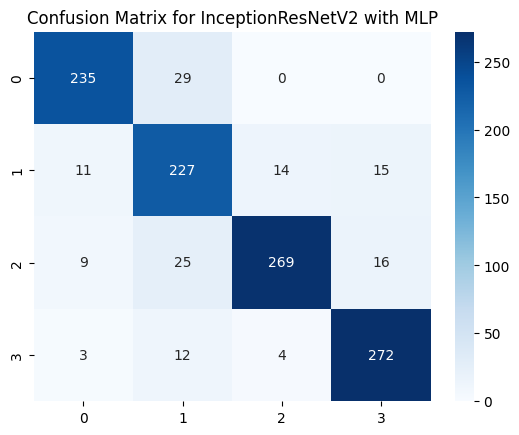


Training GNB with InceptionResNetV2 features...

Classification Report for InceptionResNetV2 with GNB:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       264
           1       0.42      0.59      0.49       267
           2       0.88      0.49      0.63       319
           3       0.74      0.80      0.77       291

    accuracy                           0.65      1141
   macro avg       0.69      0.66      0.66      1141
weighted avg       0.70      0.65      0.66      1141



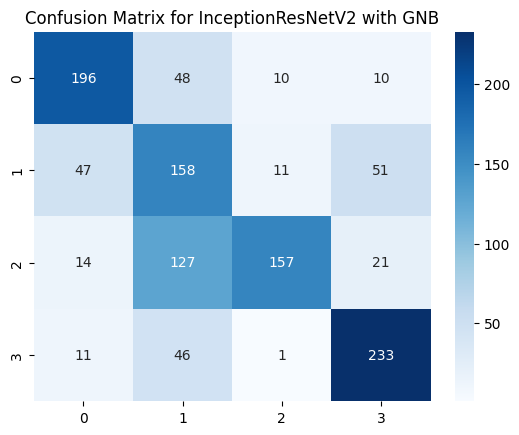

In [5]:
# Define CNN models to compare and initialize result storage
model_names = ['DenseNet201', 'EfficientNetB5', 'InceptionResNetV2']
results = []

# Loop through each CNN model for feature extraction and evaluation
for model_name in model_names:
    # Load the pre-trained CNN model
    feature_extractor = load_model(model_name)
    print(f"\nExtracting features using {model_name}...")

    # Extract features from the model
    train_features, train_labels = extract_features(train_generator, feature_extractor)
    val_features, val_labels = extract_features(validation_generator, feature_extractor)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=100)
    train_features_pca = pca.fit_transform(train_features)
    val_features_pca = pca.transform(val_features)

    # Define classifiers
    classifiers = {
        "SVM": SVC(kernel='rbf', C=10, gamma=0.0001),
        "MLP": MLPClassifier(hidden_layer_sizes=(256, 128), learning_rate_init=0.001, max_iter=100),
        "GNB": GaussianNB()
    }

    # Train and evaluate each classifier
    for clf_name, clf in classifiers.items():
        print(f"\nTraining {clf_name} with {model_name} features...")
        clf.fit(train_features_pca, np.argmax(train_labels, axis=1))
        preds = clf.predict(val_features_pca)
        true_labels = np.argmax(val_labels, axis=1)

        # Evaluate and store results
        accuracy = accuracy_score(true_labels, preds)
        report = classification_report(true_labels, preds, output_dict=True)
        results.append({
            'Model': model_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'Classification Report': report
        })
        
        # Print and plot results
        print(f"\nClassification Report for {model_name} with {clf_name}:\n", classification_report(true_labels, preds))
        cm = confusion_matrix(true_labels, preds)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f'Confusion Matrix for {model_name} with {clf_name}')
        plt.show()


In [6]:
# Convert results to DataFrame for a summary table
results_df = pd.DataFrame(results)
results_df[['Model', 'Classifier', 'Accuracy']]


,Model,Classifier,Accuracy
0,DenseNet201,SVM,0.822962
1,DenseNet201,MLP,0.892200
2,DenseNet201,GNB,0.730938
3,EfficientNetB5,SVM,0.314636
4,EfficientNetB5,MLP,0.737949
5,EfficientNetB5,GNB,0.458370
6,InceptionResNetV2,SVM,0.798422
7,InceptionResNetV2,MLP,0.879053
8,InceptionResNetV2,GNB,0.652060
